In [ ]:
import os
import sys

SHiP_ROOT_FOLDER = "/export/share/##42h8##/HCF/experiments/"
os.chdir(SHiP_ROOT_FOLDER)
sys.path.append(SHiP_ROOT_FOLDER)

In [2]:
from SHiP import SHiP
import numpy as np

from datasets.example_datasets import Datasets as ExampleDatasets
from datasets.real_world_datasets import Datasets as RealWorldDatasets
from datasets.density_datasets import Datasets as DensityDatasets

X, l = RealWorldDatasets.Optdigits.data_cached
X, l = DensityDatasets.aggregation.data_cached
X, l = ExampleDatasets.d31.data_cached

In [3]:
config = {}
# config["elbow_use_costs"] = True
config["relaxed"] = True
ship = SHiP(X, "DCTree", config=config)
costs = np.array([ship.get_tree(k).costs for k in range(1,6)])
optimal_ks = np.array([ship.get_tree(k).get_elbow_k() for k in range(1,6)])
costs, optimal_ks

(array([[8.59172396e+03, 2.97472396e+03, 2.48372396e+03, ...,
         1.16272396e+03, 1.16272396e+03, 1.16272396e+03],
        [2.38121680e+04, 3.38916795e+03, 2.62116795e+03, ...,
         5.47167950e+02, 5.47167950e+02, 5.47167950e+02],
        [6.59959916e+04, 4.81699160e+03, 2.71899160e+03, ...,
         3.41991604e+02, 3.41991604e+02, 3.41991604e+02],
        [1.82909465e+05, 8.81546532e+03, 2.98046532e+03, ...,
         2.98465316e+02, 2.98465316e+02, 2.98465316e+02],
        [5.06937947e+05, 1.97289471e+04, 3.54494713e+03, ...,
         3.66947126e+02, 3.66947126e+02, 3.66947126e+02]]),
 array([31, 28, 14,  7,  6]))

In [4]:
costs[:, 0]

array([  8591.72396234,  23812.16795   ,  65995.99160362, 182909.46531581,
       506937.94712649])

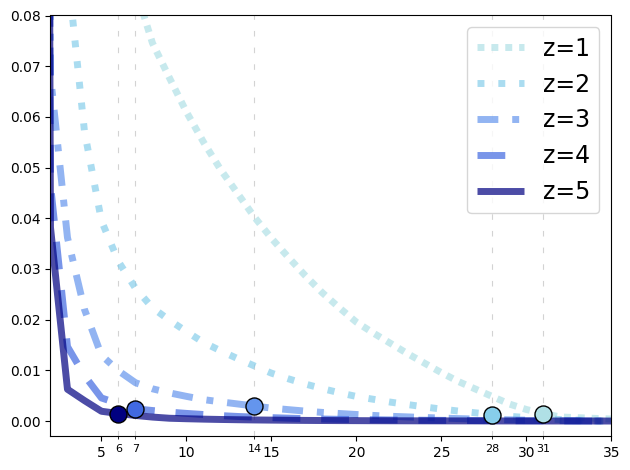

In [5]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from math import log10, floor

def print_scientif(x):
    exp = floor(log10(x))
    return f"{x/(10**exp):.2}E{exp:02}"
    # return np.format_float_scientific(x, 1)

linestyles = [(1,1), (1, 2), (3, 2, 1, 2), (4, 3)] + [(1, 0)]
# colors = ["blue", "green", "darkorange", "purple", "teal"]
colors = ["powderblue", "skyblue", "cornflowerblue", "royalblue", "navy"]

def plot_elbow(costs, optimal_ks, start_k=2, end_k=40, title=None, show=False):
    costs_ = np.array(costs)[:, start_k-1:end_k]
    n = len(costs_)
    x = range(start_k, end_k + 1)

    y_norm = (costs_ - np.min(costs_, axis=1)[:, np.newaxis]) / (np.max(costs_, axis=1) - np.min(costs_, axis=1))[:, np.newaxis]

    offset = 1/(n-1)*np.arange(n)
    # offset_min = 1.2 * offset
    # offset_max = ((4 - offset_min) * offset + 2)
    
    # offset_min = 2.5 * offset
    # offset_max = ((7 - offset_min) * offset + 5)
    
    # offset_min = 0.2 * offset
    # offset_max = 0.5 - 0.5 * offset_min   # 0.5 - ...
    # y_norm = y_norm * offset_max[:,np.newaxis] + offset_min[:,np.newaxis]

    # y_norm = y_norm + offset[:,np.newaxis]


    fig, ax1 = plt.subplots()

    for i in range(n):
        y = y_norm[i]
        ax1.plot(x, y, label=f"z={i+1}", linewidth=5, alpha=0.7, dashes=linestyles[i], color=colors[i])

    for i in range(n):
        y = y_norm[i]
        optimal_k = int(optimal_ks[i])
        ax1.scatter(optimal_k, y[optimal_k-start_k], marker='o', s=150, zorder=2, edgecolor="black", color=colors[i]) #, color="black")

    # ax1.set_yticks([])

    # ax1.set_xticks(x)
    # ax1.xaxis.set_major_locator(ticker.AutoLocator())
    # ax1.set_yticks(y_norm[:,0], map(print_scientif, costs_[:,0]))
    # ax2 = ax1.twinx()
    # ax2.set_ylim(ax1.get_ylim())
    # ax2.set_yticks(y_norm[:,-1], map(print_scientif, costs_[:,-1]))
    # ax2.zorder = -1

    # ax1.set_xlabel('$k$', fontsize=17)
    # ax1.set_ylabel('Cost', fontsize=17)

    # ax1.set_xscale('log')
    # ax1.set_yscale('linear')  # 'linear', 'log', 'symlog', 'asinh', 'logit', 'function', 'functionlog'

    # ax1.set_xticks([5,20,35,50],[5,20,35,50], fontsize=11)
    ax1.set_xticks(optimal_ks, map(int, optimal_ks), minor=True, fontsize=8)

    ax1.set_axisbelow(True)
    # ax1.grid(axis="x", color="lightgray")
    ax1.grid(axis="x", which="minor", color="lightgray", linestyle=(0, (5, 10)))
    ax1.set_facecolor("none")
    # ax2.grid(color="lightgray")
    if title:
        plt.title(title, fontsize=21)
    handles, labels = ax1.get_legend_handles_labels()
    ax1.legend(handles[::], labels[::], fontsize=17)

    # Show the plot
    if show:
        plt.tight_layout()
        plt.show()

    return fig

fig = plot_elbow(costs[:,:], optimal_ks[:], 1, 50)

fig.gca().set_xlim(2, 35)
fig.gca().set_ylim(-0.003, 0.08)


plt.tight_layout()
plt.subplots_adjust(wspace=0.0, hspace=0.0)
plt.savefig("elbow_plot_zoomed_in.pdf", format="pdf", bbox_inches="tight", pad_inches=0)
plt.show()

In [6]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from math import log10, floor

def print_scientif(x):
    exp = floor(log10(x))
    return f"{x/(10**exp):.2}E{exp:02}"
    # return np.format_float_scientific(x, 1)

def plot_elbow_(costs, optimal_ks, start_k=2, end_k=40, title=None):
    costs_ = np.array(costs)[:, start_k-1:end_k]
    n = len(costs_)
    x = range(start_k, end_k + 1)

    y_norm = (costs_ - np.min(costs_, axis=1)[:, np.newaxis]) / (np.max(costs_, axis=1) - np.min(costs_, axis=1))[:, np.newaxis]

    offset = 1/(n-1)*np.arange(n)
    # offset_min = 1.2 * offset
    # offset_max = ((4 - offset_min) * offset + 2)
    
    # offset_min = 2.5 * offset
    # offset_max = ((7 - offset_min) * offset + 5)
    
    # offset_min = 0.2 * offset
    # offset_max = 0.5 - 0.5 * offset_min   # 0.5 - ...
    # y_norm = y_norm * offset_max[:,np.newaxis] + offset_min[:,np.newaxis]

    # y_norm = y_norm + offset[:,np.newaxis]


    fig, ax1 = plt.subplots()

    for i in range(n):
        y = y_norm[i]
        ax1.plot(x, y, label=f"z={i+1}", linewidth=3, alpha=0.7, dashes=linestyles[i], color=colors[i])

    for i in range(n):
        y = y_norm[i]
        optimal_k = int(optimal_ks[i])
        ax1.scatter(optimal_k, y[optimal_k-start_k], marker='o', s=100, zorder=2, edgecolor="black", color=colors[i])

    # ax1.set_yticks([])

    # ax1.set_xticks(x)
    # ax1.xaxis.set_major_locator(ticker.AutoLocator())
    # ax1.set_yticks(y_norm[:,0], map(print_scientif, costs_[:,0]))
    # ax2 = ax1.twinx()
    # ax2.set_ylim(ax1.get_ylim())
    # ax2.set_yticks(y_norm[:,-1], map(print_scientif, costs_[:,-1]))
    # ax2.zorder = -1

    # ax1.set_xlabel('$k$', fontsize=17)
    # ax1.set_ylabel('Cost', fontsize=17)

    # ax1.set_xscale('log')
    # ax1.set_yscale('linear')  # 'linear', 'log', 'symlog', 'asinh', 'logit', 'function', 'functionlog'

    # ax1.set_xticks([5,20,35,50],[5,20,35,50], fontsize=11)
    # ax1.set_xticks(optimal_ks, map(int, optimal_ks), minor=True, fontsize=8)

    ax1.set_axisbelow(True)
    # ax1.grid(axis="x", color="lightgray")
    # ax1.grid(axis="x", which="minor", color="lightgray", linestyle=(0, (5, 10)))
    ax1.set_facecolor("none")
    # ax2.grid(color="lightgray")
    if title:
        plt.title(title, fontsize=21)
    # handles, labels = ax1.get_legend_handles_labels()
    # ax1.legend(handles[::], labels[::], fontsize=17)

    return fig
    # Show the plot
    plt.tight_layout()
    plt.show()

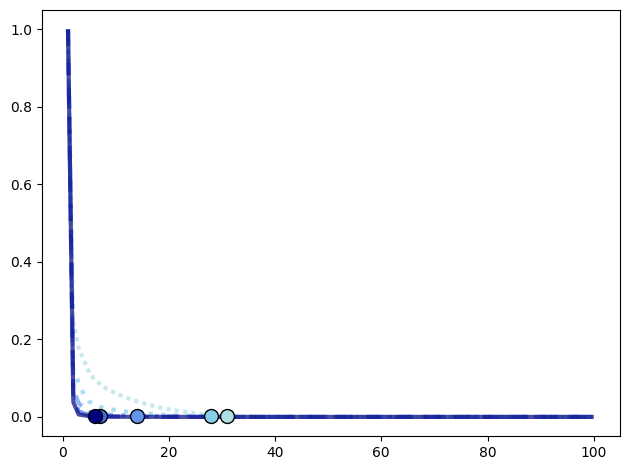

In [7]:
k = 100
fig = plot_elbow_(costs[:,:], optimal_ks[:], 1, k)
# fig = plot_elbow_(costs[:,:], optimal_ks[:], 1, 100)
# fig = plot_elbow_(costs[:,:], optimal_ks[:], 1, len(costs[0])-1)

# fig.gca().set_xlim(2, 35)
# fig.gca().set_ylim(-0.01, 0.2)

plt.tight_layout()
plt.subplots_adjust(wspace=0.0, hspace=0.0)
plt.savefig(f"elbow_plot.pdf", format="pdf", bbox_inches="tight", pad_inches=0)
plt.show()

In [8]:
for k in range(100, 100, 10):
    fig = plot_elbow_(costs[:,:], optimal_ks[:], 1, k)
    # fig = plot_elbow_(costs[:,:], optimal_ks[:], 1, 100)
    # fig = plot_elbow_(costs[:,:], optimal_ks[:], 1, len(costs[0])-1)

    # fig.gca().set_xlim(2, 35)
    # fig.gca().set_ylim(-0.01, 0.2)

    plt.tight_layout()
    plt.subplots_adjust(wspace=0.0, hspace=0.0)
    plt.savefig(f"elbow_plots/elbow_plot_{k}.pdf", format="pdf", bbox_inches="tight", pad_inches=0)
    plt.show()


In [9]:
def plot_elbow_dataset(dataset):
    X, l = dataset.data_cached

    config = {}
    # config["elbow_use_costs"] = True
    ship = SHiP(X, "DCTree", config=config)
    costs = np.array([ship.get_tree(k).costs for k in range(1,6)])
    optimal_ks = np.array([ship.get_tree(k).get_elbow_k() for k in range(1,6)])

    plot_elbow(costs[:,:], optimal_ks[:], 2, int(max(optimal_ks)*1.5), title=dataset.name, show=True)

3-spiral


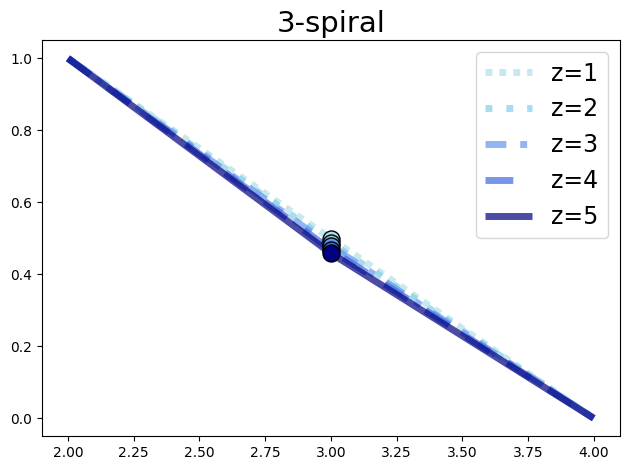

aggregation


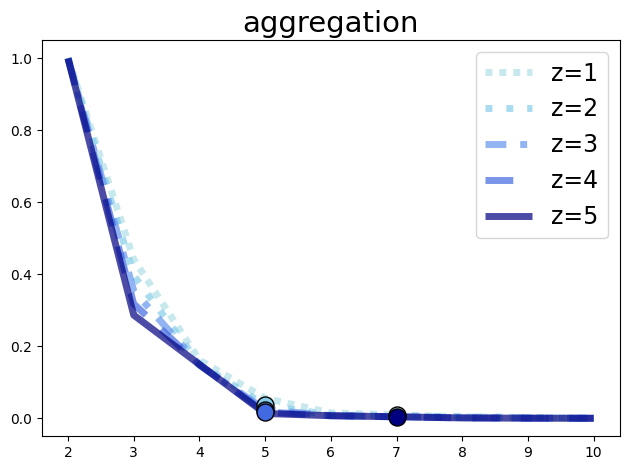

chainlink


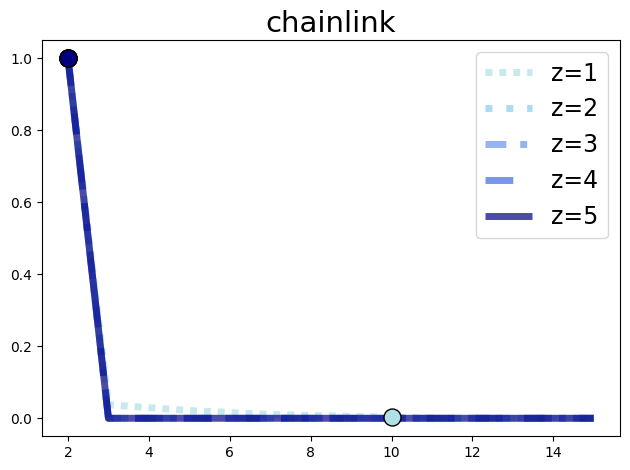

cluto-t4-8k


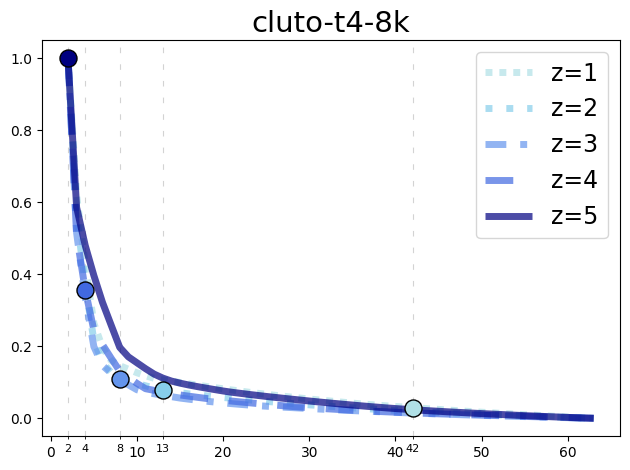

cluto-t5-8k


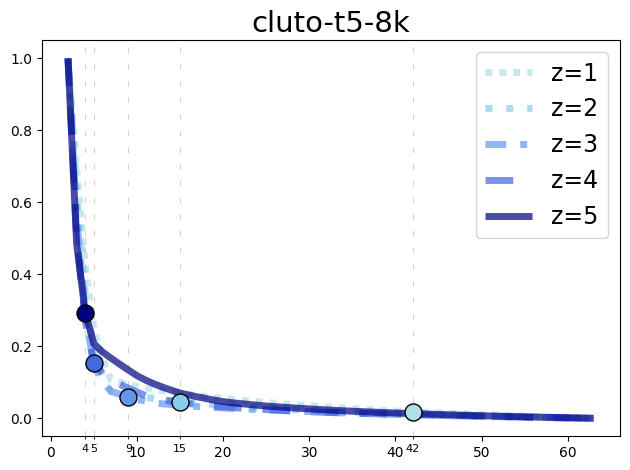

cluto-t7-10k


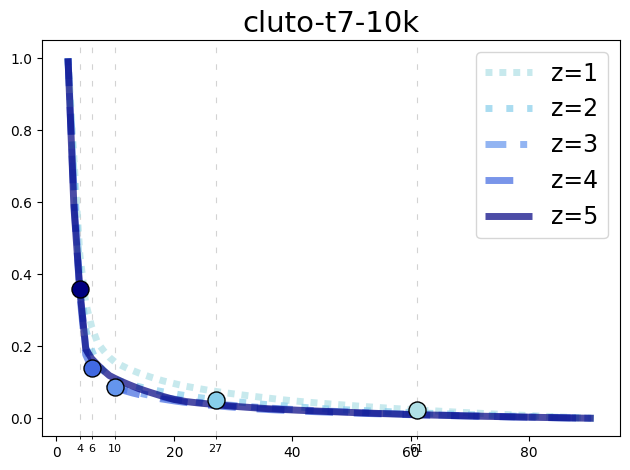

cluto-t8-8k


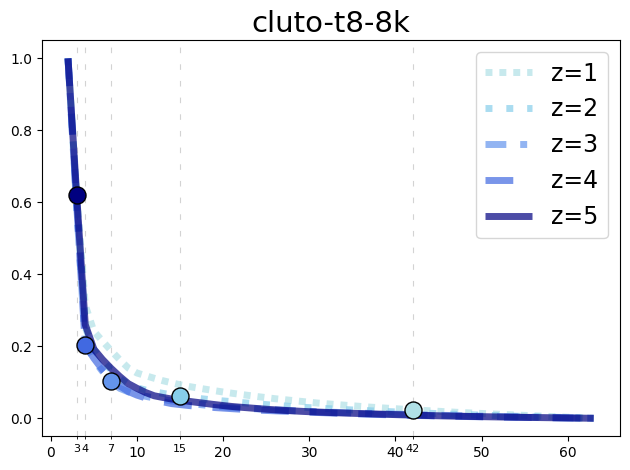

complex8


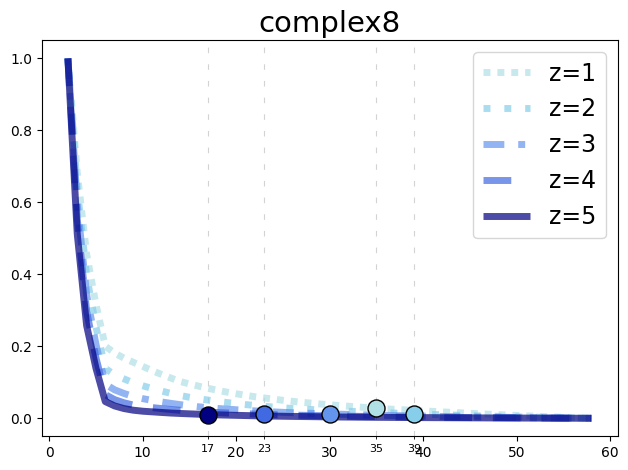

complex9


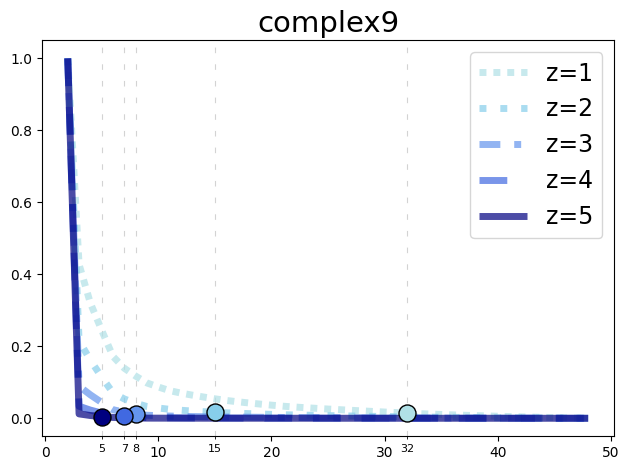

compound


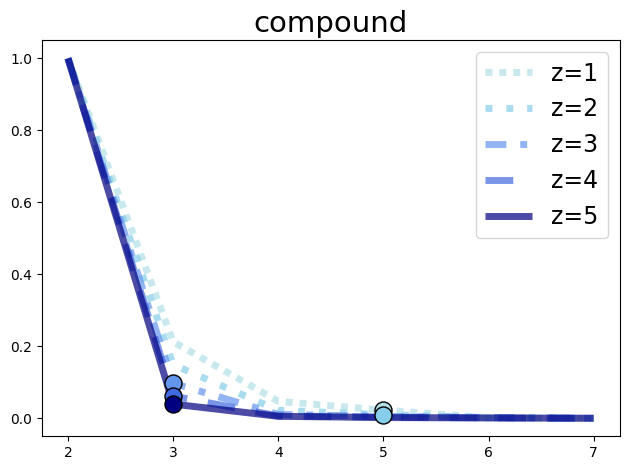

dartboard1


/tmp/ipykernel_544061/2256879945.py:19: RuntimeWarning: invalid value encountered in divide
  y_norm = (costs_ - np.min(costs_, axis=1)[:, np.newaxis]) / (np.max(costs_, axis=1) - np.min(costs_, axis=1))[:, np.newaxis]


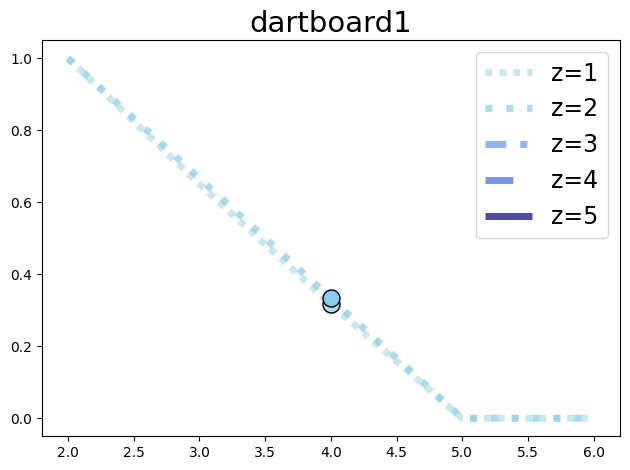

diamond9


/tmp/ipykernel_544061/2256879945.py:19: RuntimeWarning: invalid value encountered in divide
  y_norm = (costs_ - np.min(costs_, axis=1)[:, np.newaxis]) / (np.max(costs_, axis=1) - np.min(costs_, axis=1))[:, np.newaxis]


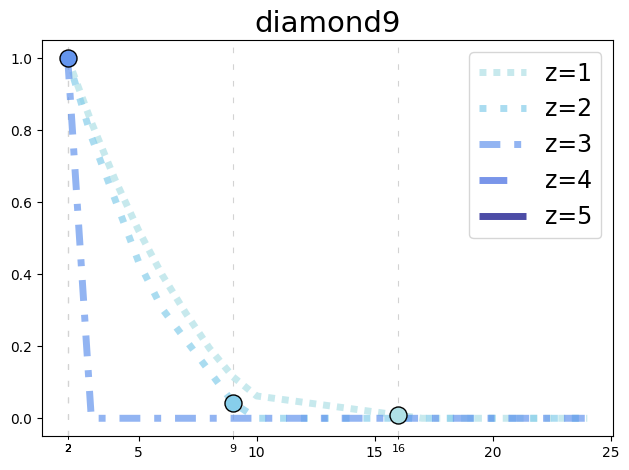

smile1


/tmp/ipykernel_544061/2256879945.py:19: RuntimeWarning: invalid value encountered in divide
  y_norm = (costs_ - np.min(costs_, axis=1)[:, np.newaxis]) / (np.max(costs_, axis=1) - np.min(costs_, axis=1))[:, np.newaxis]


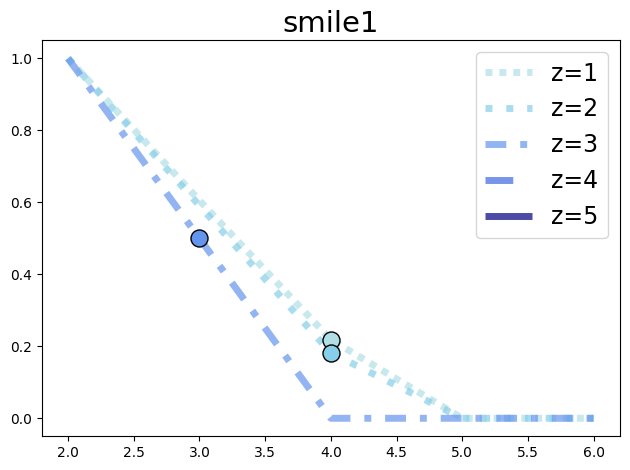

jain


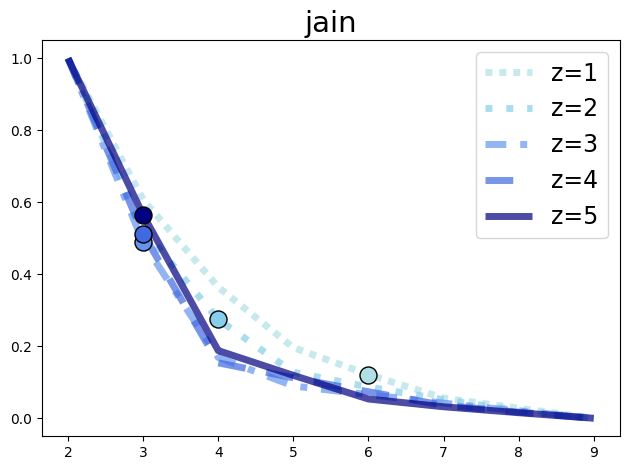

In [10]:
for dataset in DensityDatasets:
    print(dataset.name)
    plot_elbow_dataset(dataset)

d31


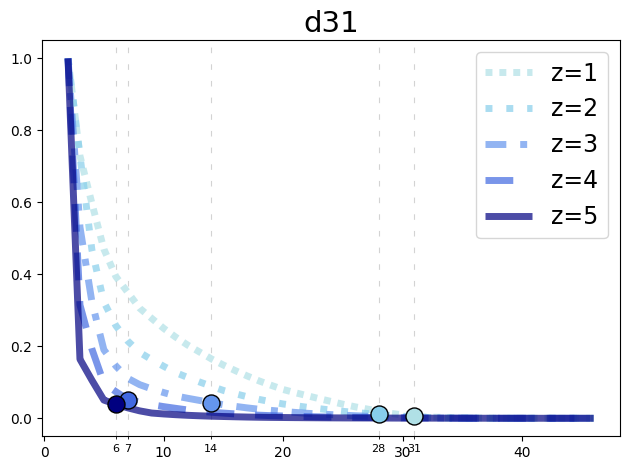

compound_left


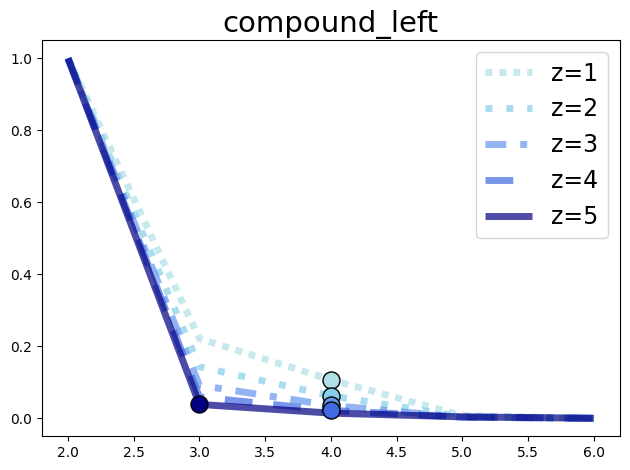

noisy


/tmp/ipykernel_544061/2256879945.py:19: RuntimeWarning: invalid value encountered in divide
  y_norm = (costs_ - np.min(costs_, axis=1)[:, np.newaxis]) / (np.max(costs_, axis=1) - np.min(costs_, axis=1))[:, np.newaxis]


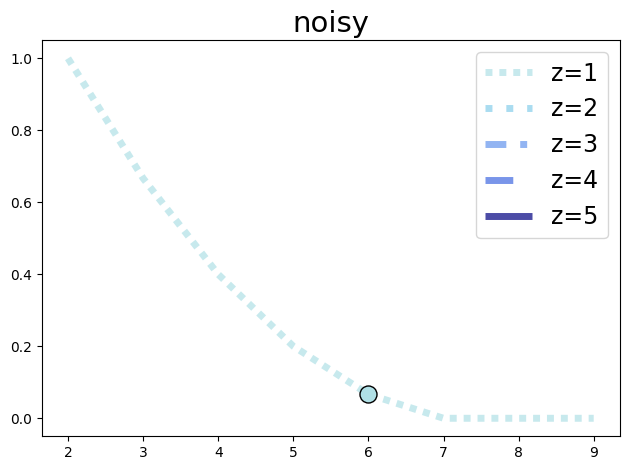

adipose


/tmp/ipykernel_544061/2256879945.py:19: RuntimeWarning: invalid value encountered in divide
  y_norm = (costs_ - np.min(costs_, axis=1)[:, np.newaxis]) / (np.max(costs_, axis=1) - np.min(costs_, axis=1))[:, np.newaxis]


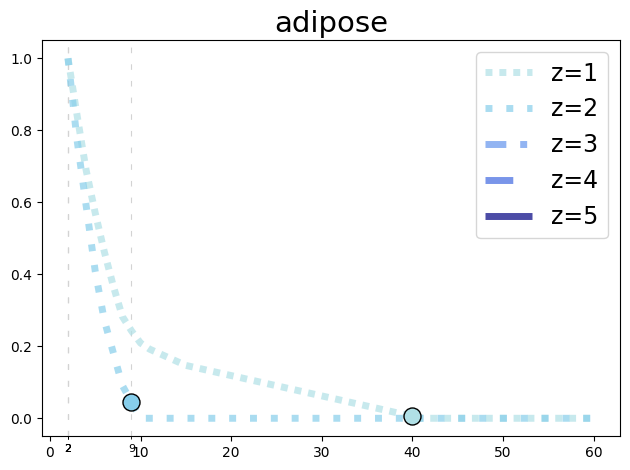

airway


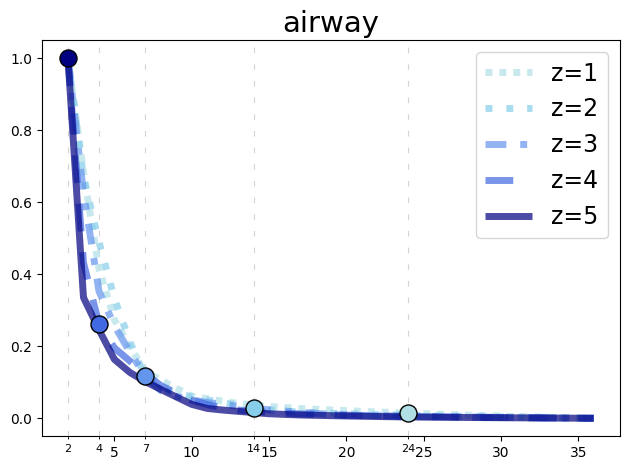

lactate


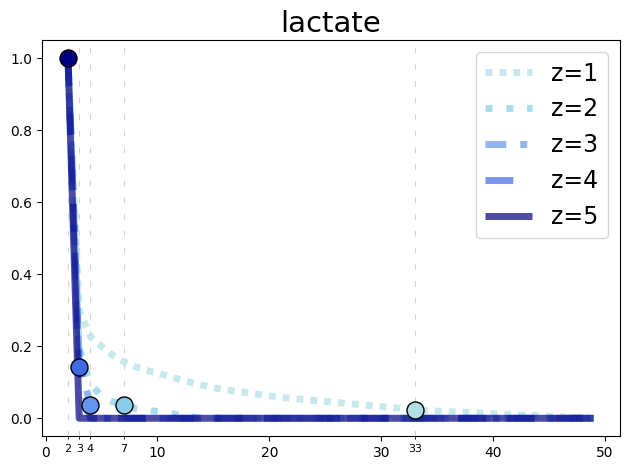

jain


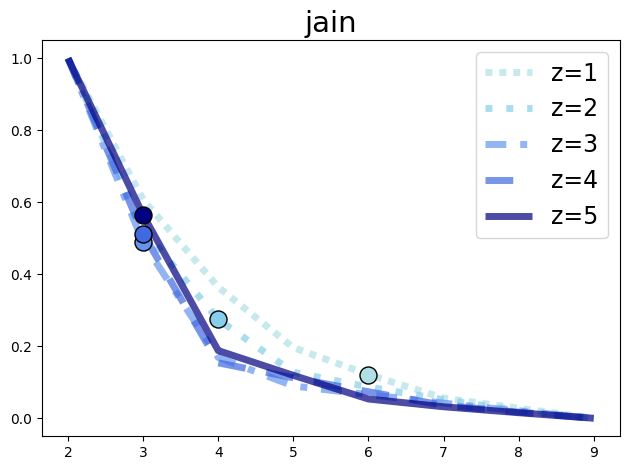

pathbased


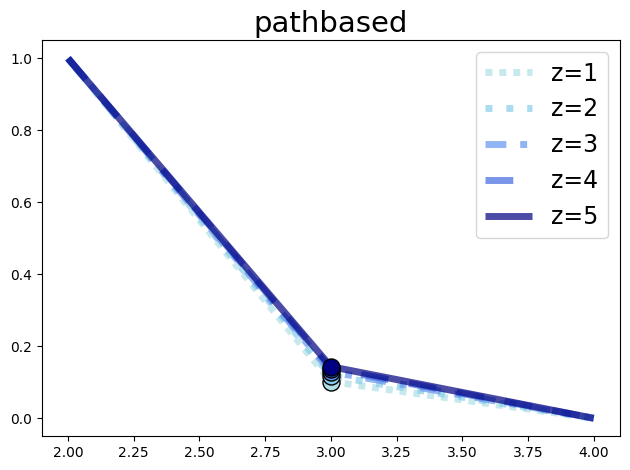

boxes3


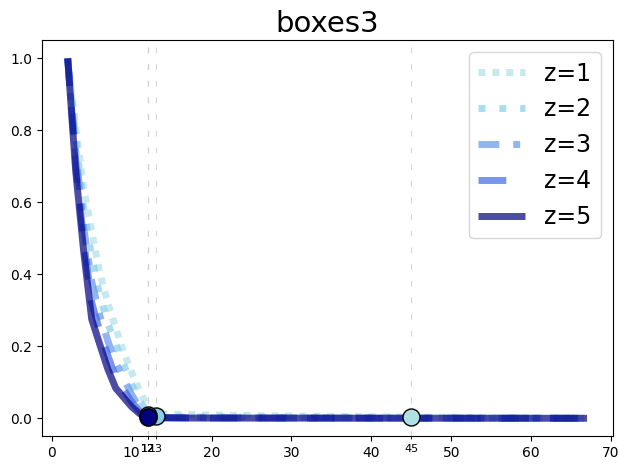

In [11]:
for dataset in ExampleDatasets:
    print(dataset.name)
    plot_elbow_dataset(dataset)